<a href="https://colab.research.google.com/github/SMichael2021/Home1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%B0%D0%BA_%D1%81%D0%BE%D0%B7%D0%B4%D0%B0%D1%82%D1%8C_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BA%D1%83_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_chatGPT_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для создания нейросети с помощью chatGPT необходимо составить очень подробную инструкцию, как организованы данные, в каком они находятся формате, какие папки содержит архив, что в них находится и как мы хотим, чтобы chatGPT их подготовил. Это - одна из самых важных частей инструкции. Надо отметить, что chatGPT не может что-то скачивать или разархивировать, поэтому и инструкции стоит делать в формате "напиши код скачивания" или "напиши код разархивации", вместо "скачай" или "разархивируй".

Рассказываем, как устроены наши данные, и как их нужно подготовить для подачи в сеть.

## Запрос № 1 к ChatGPT:

Напиши подготовку тенировочных данных для нейронной сети по классификации изображений, для этого для напиши код скачивания датасета при помощи gdown по этой ссылке 'https://storage.yandexcloud.net/aiueducation/marketing/datasets/reality.zip', и код разархивации датасета из zip формата в директорию 'content/cars'. Датасет не поделен на train и test. Он состоит из 10 папок, название каждой папки соответствует названию категории, каждый файл необходимо открыть при помощи Image.open, не используй генератор. Добавь в код масштабирование данных и приведи y_train  к формату one hot encoding. Используй LabelEncoder для кодирования строковых меток в целые числа. Определи список названий классов и количество классов. создай простую keras модель на получившихся данных


## Ответ ChatGPT:

In [ ]:
import os
import gdown
import zipfile
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Скачиваем датасет
url = 'https://storage.yandexcloud.net/aiueducation/marketing/datasets/reality.zip'
gdown.download(url, 'reality.zip', quiet=False)

# Распаковываем набор данных
with zipfile.ZipFile("reality.zip","r") as zip_ref:
    zip_ref.extractall("content/cars")

# Загружаем изображения и ярлыки
X = []
y = []
classes = os.listdir("content/cars")
for i, class_name in enumerate(classes):
    for image_name in os.listdir("content/cars/" + class_name):
        image = Image.open("content/cars/" + class_name + "/" + image_name)
        image = image.resize((64, 64))
        X.append(np.array(image))
        y.append(class_name)

# Масштабируем данные
X = np.array(X) / 255.0

# Кодируем ярлыки
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Приводим ярлыки к формату One-hot encoding
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

# Перемешиваем данные
X, y = shuffle(X, y)

# Делим набор данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем простую модель keras
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Downloading...
From: https://storage.yandexcloud.net/aiueducation/marketing/datasets/reality.zip
To: /content/reality.zip
100%|██████████| 127M/127M [00:05<00:00, 22.3MB/s]


In [ ]:
num_classes

10

Получаем код для запуска обучения, строим график. 

## Запрос № 2 к ChatGPT:
Теперь напиши, как дополнить этот код, чтобы запустить обучение модели на 10 эпохах, построй график точности по эпохам

## Ответ ChatGPT:

Epoch 1/10
75/75 [==============================] - 8s 94ms/step - loss: 1.9109 - accuracy: 0.3858 - val_loss: 1.3016 - val_accuracy: 0.5767
Epoch 2/10
75/75 [==============================] - 4s 55ms/step - loss: 0.7641 - accuracy: 0.8100 - val_loss: 0.5502 - val_accuracy: 0.8700
Epoch 3/10
75/75 [==============================] - 5s 61ms/step - loss: 0.3117 - accuracy: 0.9417 - val_loss: 0.3001 - val_accuracy: 0.9450
Epoch 4/10
75/75 [==============================] - 4s 54ms/step - loss: 0.1682 - accuracy: 0.9754 - val_loss: 0.2510 - val_accuracy: 0.9467
Epoch 5/10
75/75 [==============================] - 5s 65ms/step - loss: 0.0876 - accuracy: 0.9912 - val_loss: 0.1702 - val_accuracy: 0.9583
Epoch 6/10
75/75 [==============================] - 4s 54ms/step - loss: 0.0569 - accuracy: 0.9958 - val_loss: 0.1529 - val_accuracy: 0.9600
Epoch 7/10
75/75 [==============================] - 4s 55ms/step - loss: 0.0358 - accuracy: 0.9987 - val_loss: 0.1035 - val_accuracy: 0.9817
Epoch 8/10
75

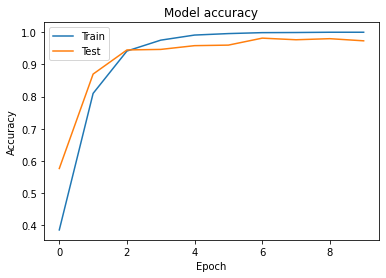

In [ ]:
import matplotlib.pyplot as plt

# Обучаем модель
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Рисуем график точности по эпохам обучения
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

*Текстовый комментарий chatGPT*

Добавив этот код, мы запускаем обучение модели на 10 эпохах. Мы сохраняем результат обучения в переменной history, чтобы построить график точности модели по эпохам. Мы используем plt.plot() для отображения истории обучения из history.history['accuracy'] (точность на обучающем наборе) и history.history['val_accuracy'] (точность на тестовом наборе). И далее добавляем легенду и отображаем график.

Пробуем создать более мощную модель, проверяем различные варианты batch_size

## Запрос № 3 к ChatGPT:

Это слишком простая модель. Создай более мощную модель, код запуска обучения, график точности, проверь в цикле различные batch_size (32, 64, 128)

## Ответ ChatGPT:

Epoch 1/10
75/75 [==============================] - 26s 328ms/step - loss: 2.7365 - accuracy: 0.3479 - val_loss: 2.4514 - val_accuracy: 0.1233
Epoch 2/10
75/75 [==============================] - 29s 383ms/step - loss: 1.1348 - accuracy: 0.6696 - val_loss: 2.4751 - val_accuracy: 0.1783
Epoch 3/10
75/75 [==============================] - 25s 340ms/step - loss: 0.5775 - accuracy: 0.8150 - val_loss: 2.8198 - val_accuracy: 0.3350
Epoch 4/10
75/75 [==============================] - 23s 303ms/step - loss: 0.4424 - accuracy: 0.8679 - val_loss: 2.4008 - val_accuracy: 0.4100
Epoch 5/10
75/75 [==============================] - 24s 319ms/step - loss: 0.2771 - accuracy: 0.9125 - val_loss: 2.0641 - val_accuracy: 0.4117
Epoch 6/10
75/75 [==============================] - 23s 310ms/step - loss: 0.2381 - accuracy: 0.9296 - val_loss: 1.0043 - val_accuracy: 0.7167
Epoch 7/10
75/75 [==============================] - 23s 311ms/step - loss: 0.1747 - accuracy: 0.9450 - val_loss: 0.6200 - val_accuracy: 0.8200

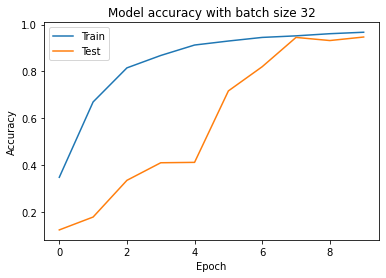

Epoch 1/10
38/38 [==============================] - 23s 598ms/step - loss: 0.0674 - accuracy: 0.9758 - val_loss: 0.0873 - val_accuracy: 0.9717
Epoch 2/10
38/38 [==============================] - 24s 622ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0724 - val_accuracy: 0.9783
Epoch 3/10
38/38 [==============================] - 22s 589ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0843 - val_accuracy: 0.9783
Epoch 4/10
38/38 [==============================] - 22s 585ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.1089 - val_accuracy: 0.9700
Epoch 5/10
38/38 [==============================] - 24s 639ms/step - loss: 0.0241 - accuracy: 0.9933 - val_loss: 0.0653 - val_accuracy: 0.9783
Epoch 6/10
38/38 [==============================] - 23s 596ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.1128 - val_accuracy: 0.9717
Epoch 7/10
38/38 [==============================] - 22s 586ms/step - loss: 0.0207 - accuracy: 0.9925 - val_loss: 0.0610 - val_accuracy: 0.9850

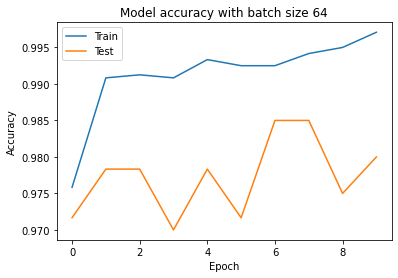

Epoch 1/10
19/19 [==============================] - 22s 1s/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0592 - val_accuracy: 0.9817
Epoch 2/10
19/19 [==============================] - 23s 1s/step - loss: 0.0116 - accuracy: 0.9954 - val_loss: 0.0653 - val_accuracy: 0.9800
Epoch 3/10
19/19 [==============================] - 22s 1s/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0737 - val_accuracy: 0.9717
Epoch 4/10
19/19 [==============================] - 23s 1s/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0635 - val_accuracy: 0.9783
Epoch 5/10
19/19 [==============================] - 23s 1s/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.0800 - val_accuracy: 0.9750
Epoch 6/10
19/19 [==============================] - 23s 1s/step - loss: 0.0058 - accuracy: 0.9975 - val_loss: 0.0674 - val_accuracy: 0.9783
Epoch 7/10
19/19 [==============================] - 22s 1s/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.0716 - val_accuracy: 0.9750
Epoch 8/10
19/19 [==

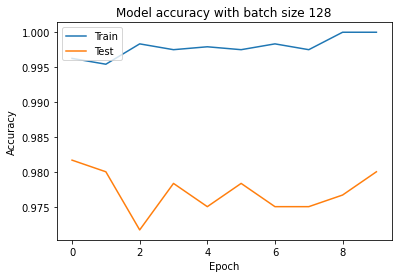

In [ ]:
from keras.layers import Dropout, BatchNormalization

# Создаем более мощную модель
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_sizes = [32, 64, 128]
for batch_size in batch_sizes:
    # Обучаем модель
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test))

    # Рисуем график точности по эпохам обучения
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy with batch size {batch_size}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


Получилось не совсем то, что мы хотели - код, созданный chatGPT не проверяет точность при разных batch_size, а дообучает модель на их разных размерах. Необходимо было более точно составить запрос.

## Запрос № 4 к ChatGPT:

Сделай код запуска этой модели в цикле с разными размерами batch_size (32, 64, 128), выведи график точности по кажому запуску

## Ответ ChatGPT:

Epoch 1/10
75/75 [==============================] - 34s 439ms/step - loss: 2.6221 - accuracy: 0.3725 - val_loss: 2.5874 - val_accuracy: 0.0917
Epoch 2/10
75/75 [==============================] - 23s 308ms/step - loss: 1.0892 - accuracy: 0.6767 - val_loss: 2.9518 - val_accuracy: 0.0783
Epoch 3/10
75/75 [==============================] - 23s 310ms/step - loss: 0.5626 - accuracy: 0.8250 - val_loss: 2.2848 - val_accuracy: 0.2550
Epoch 4/10
75/75 [==============================] - 24s 318ms/step - loss: 0.4171 - accuracy: 0.8679 - val_loss: 2.3741 - val_accuracy: 0.3317
Epoch 5/10
75/75 [==============================] - 32s 435ms/step - loss: 0.2462 - accuracy: 0.9225 - val_loss: 1.9876 - val_accuracy: 0.3817
Epoch 6/10
75/75 [==============================] - 31s 416ms/step - loss: 0.2302 - accuracy: 0.9254 - val_loss: 0.5928 - val_accuracy: 0.8250
Epoch 7/10
75/75 [==============================] - 25s 337ms/step - loss: 0.1329 - accuracy: 0.9500 - val_loss: 0.3403 - val_accuracy: 0.9050

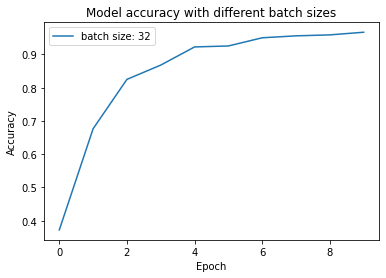

Epoch 1/10
38/38 [==============================] - 28s 720ms/step - loss: 2.9534 - accuracy: 0.3038 - val_loss: 2.3186 - val_accuracy: 0.1133
Epoch 2/10
38/38 [==============================] - 25s 664ms/step - loss: 1.2082 - accuracy: 0.6342 - val_loss: 2.5612 - val_accuracy: 0.1317
Epoch 3/10
38/38 [==============================] - 26s 695ms/step - loss: 0.7120 - accuracy: 0.7825 - val_loss: 2.9321 - val_accuracy: 0.1050
Epoch 4/10
38/38 [==============================] - 26s 697ms/step - loss: 0.4189 - accuracy: 0.8617 - val_loss: 3.2775 - val_accuracy: 0.1033
Epoch 5/10
38/38 [==============================] - 24s 624ms/step - loss: 0.3223 - accuracy: 0.8917 - val_loss: 3.5597 - val_accuracy: 0.1033
Epoch 6/10
38/38 [==============================] - 27s 699ms/step - loss: 0.2404 - accuracy: 0.9192 - val_loss: 4.6531 - val_accuracy: 0.1033
Epoch 7/10
38/38 [==============================] - 25s 673ms/step - loss: 0.1789 - accuracy: 0.9383 - val_loss: 4.6891 - val_accuracy: 0.1033

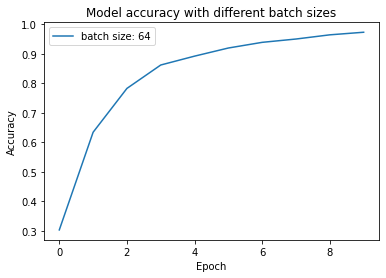

Epoch 1/10
19/19 [==============================] - 25s 1s/step - loss: 3.2202 - accuracy: 0.2646 - val_loss: 2.2656 - val_accuracy: 0.0867
Epoch 2/10
19/19 [==============================] - 23s 1s/step - loss: 1.4382 - accuracy: 0.5629 - val_loss: 2.3426 - val_accuracy: 0.0767
Epoch 3/10
19/19 [==============================] - 32s 2s/step - loss: 0.8945 - accuracy: 0.7175 - val_loss: 2.3755 - val_accuracy: 0.1350
Epoch 4/10
19/19 [==============================] - 24s 1s/step - loss: 0.6392 - accuracy: 0.7979 - val_loss: 2.5453 - val_accuracy: 0.0767
Epoch 5/10
19/19 [==============================] - 23s 1s/step - loss: 0.3792 - accuracy: 0.8771 - val_loss: 2.4882 - val_accuracy: 0.0817
Epoch 6/10
19/19 [==============================] - 25s 1s/step - loss: 0.2787 - accuracy: 0.9075 - val_loss: 2.5827 - val_accuracy: 0.1017
Epoch 7/10
19/19 [==============================] - 24s 1s/step - loss: 0.2386 - accuracy: 0.9183 - val_loss: 2.5586 - val_accuracy: 0.1650
Epoch 8/10
19/19 [==

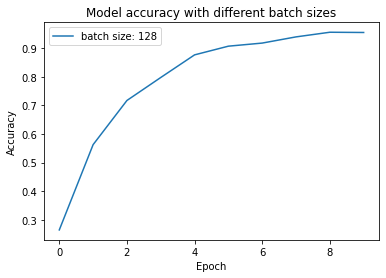

In [ ]:
batch_size_list = [32, 64, 128]

for batch_size in batch_size_list:
    # Создаем более мощную модель
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Обучаем модель
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test))
    
    # Рисуем график точности по эпохам обучения
    plt.plot(history.history['accuracy'], label=f'batch size: {batch_size}')
    plt.title('Model accuracy with different batch sizes')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

Таким образом, мы получили (хоть и не с первого раза) то, что мы хотели (почти). Стоило добавить, что графики нужно было отрисовывать по точности на проверочной выборке.

## Запрос № 5 к ChatGPT:

Как увеличить аккураси нашей модели?

## Ответ ChatGPT:

Есть различные способы увеличить точность модели:

1. Использование более мощной модели: использование большего количества сверточных слоев, нейронов и слоев связи.

2. Использование более большого датасета: использование большего количества данных для обучения модели может увеличить точность.

3. Дополнительная аугментация данных: использование аугментации данных, такой как повороты, масштабирование и другие, может помочь модели обобщаться на новые данные.

4. Использование сверточных сетей предварительно обученных (Transfer Learning): использование предварительно обученных сверточных сетей может существенно увеличить точность модели.

5. Использование другой оптимизации и другой функции потерь для обучения модели: использование более эффективных алгоритмов оптимизации, таких как Adam, RMSprop или Adagrad и использование более подходящей функции потерь для задачи классификации, такой как categorical_crossentropy или sparse_categorical_crossentropy может помочь улучшить точность модели.

6. Использование регуляризации: использование регуляризации, такой как L1 и L2, может помочь предотвратить переобучение модели.

7. Использование стандартизации данных: использование стандартизации данных может помочь сделать данные более однородными и улучшить точность модели.

## Запрос № 6

Сделай в цикле проверку точности последней модели с разными оптимизаторами и выведи график сравнения полученных точностей



## Ответ ChatGPT:

Epoch 1/10
75/75 [==============================] - 23s 304ms/step - loss: 2.8259 - accuracy: 0.3358 - val_loss: 2.4004 - val_accuracy: 0.1133
Epoch 2/10
75/75 [==============================] - 23s 305ms/step - loss: 1.2947 - accuracy: 0.6246 - val_loss: 3.2331 - val_accuracy: 0.1733
Epoch 3/10
75/75 [==============================] - 23s 302ms/step - loss: 0.7339 - accuracy: 0.7758 - val_loss: 3.2309 - val_accuracy: 0.1517
Epoch 4/10
75/75 [==============================] - 23s 306ms/step - loss: 0.5542 - accuracy: 0.8296 - val_loss: 4.1638 - val_accuracy: 0.1183
Epoch 5/10
75/75 [==============================] - 23s 306ms/step - loss: 0.3883 - accuracy: 0.8746 - val_loss: 1.9678 - val_accuracy: 0.4583
Epoch 6/10
75/75 [==============================] - 22s 298ms/step - loss: 0.2941 - accuracy: 0.9067 - val_loss: 2.3459 - val_accuracy: 0.3700
Epoch 7/10
75/75 [==============================] - 23s 308ms/step - loss: 0.2303 - accuracy: 0.9287 - val_loss: 0.5580 - val_accuracy: 0.7817

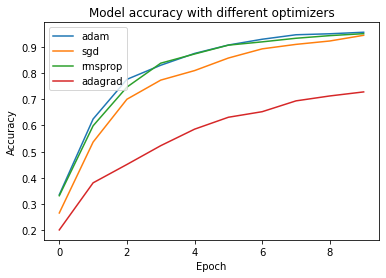

In [ ]:
from keras import optimizers

optimizer_list = ['adam', 'sgd', 'rmsprop', 'adagrad']

for optimizer in optimizer_list:
    # Создаем более мощную модель
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Обучаем модель
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    
    # Рисуем график точности по эпохам обучения
    plt.plot(history.history['accuracy'], label=optimizer)
    plt.title('Model accuracy with different optimizers')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
plt.show()


*Комментарий ChatGPT:*

*В этом коде используется цикл for, чтобы протестировать точность модели с различными оптимизаторами и отобразить график сравнения полученных точностей. В каждой итерации цикла инициализируется модель с различным оптимизатором, затем обучается и отображается график точности по эпохам для каждого оптимизатора. В конце цикла график отображается с использованием plt.show(), чтобы можно было сравнить точности моделей с различными оптимизаторами.*

Попробуем изменить некоторые параметры модели, дав точные указания.

## Запрос № 6 к ChatGPT:

Напиши код запуска предыдущей модели, заменив Flatten на GlobalMaxPooling2D, оптимизатор Adam, batch_size = 32, добавь слой Dropout после каждого BatchNormalization. Выведи график обучения на проверочной выборке (в этот раз не допустим недосказанности и уточним, по какой выборке следует отрисовывать графики)

## Ответ ChatGPT:

In [ ]:
# Создаем более мощную модель
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2)))
model.add(GlobalMaxPooling2D())
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Рисуем график точности по эпохам обучения
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with GlobalMaxPooling2D')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


NameError: ignored

Обучение не запустилось, не импортирован используемый в архитектуре модели слой. Попросим ChatGPT исправить ошибку:

## Запрос № 7 к ChatGPT:

При выполнении кода получаем ошибку NameError: name 'GlobalMaxPooling2D' is not defined. Исправь

## Ответ ChatGPT:

*Эта ошибка возникает из-за того, что класс GlobalMaxPooling2D не импортирован из модуля keras. Чтобы исправить это, необходимо добавить следующую строку кода в начало файла:*

from keras.layers import GlobalMaxPooling2D

Epoch 1/10
75/75 [==============================] - 30s 383ms/step - loss: 2.7373 - accuracy: 0.2467 - val_loss: 2.8840 - val_accuracy: 0.1017
Epoch 2/10
75/75 [==============================] - 29s 393ms/step - loss: 1.4216 - accuracy: 0.5029 - val_loss: 3.2346 - val_accuracy: 0.1183
Epoch 3/10
75/75 [==============================] - 29s 391ms/step - loss: 0.9979 - accuracy: 0.6546 - val_loss: 3.2536 - val_accuracy: 0.1517
Epoch 4/10
75/75 [==============================] - 36s 479ms/step - loss: 0.7190 - accuracy: 0.7638 - val_loss: 3.0229 - val_accuracy: 0.2033
Epoch 5/10
75/75 [==============================] - 36s 482ms/step - loss: 0.5577 - accuracy: 0.8112 - val_loss: 2.6622 - val_accuracy: 0.3033
Epoch 6/10
75/75 [==============================] - 34s 447ms/step - loss: 0.4241 - accuracy: 0.8567 - val_loss: 2.0211 - val_accuracy: 0.3917
Epoch 7/10
75/75 [==============================] - 35s 467ms/step - loss: 0.3459 - accuracy: 0.8858 - val_loss: 1.5097 - val_accuracy: 0.5033

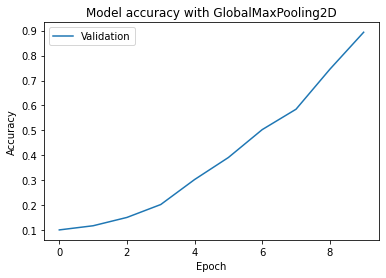

In [ ]:
from keras.layers import GlobalMaxPooling2D
# Создаем более мощную модель
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(GlobalMaxPooling2D())
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Рисуем график точности по эпохам обучения
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with GlobalMaxPooling2D')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


Все наши "пожелания" учтены, модель обучается на нужных нам параметрах, хотя, следует отметить, что архитектура модели, предложенная ChatGPT в самом начале, явно показывает лучную точность на проверочной выборке, чем результаты наших экспериментов, хотя попробовать стоило. 

## Выводы:
1. Благодара ChatGPT можно вообще обойтись без написания кода. Однако необходимо давать подробные инструкции, как "устроены" наши данные, в каком они формате, что содержат, и как их следует подготавливать. 

2. Порой ChatGPT все же допускает неточности - может забыть импортировать библиотеку или слой, это легко исправляется - достаточно написать в ChatGPT содержание ошибки и попросить исправить - будет предложено 1 или несколько вариантов, как решить проблему.

3. Необходимо внимательно просматривать код, предложенный ChatGPT, на предмет того, получили ли мы желаемый результат.  Код может срабатывать, но из-за неточных инструкций выдавать не то, что от него ожидается.

4. Чат достаточно часто вылетает, но это не проблема - достаточно перезагрузить страницу либо еще раз зайти в нужный чат - не обязательно начинать "с нуля".

5.  Важно всегда в сообщениях любым образом показывать, что нужно именно продолжить уже начатый код, иначе chatGPT  может потерять нить и не учесть, что было уже сделано. 

6. Можно запросить подробные комментарии к коду - и ChatGPT разъяснит каждую строчку или операцию - очень удобно для начинающих программистов.

7. Имеет смысл избегать команд "скачай" или "загрузи", заменив их на "напиши код для скачивания архива", например, в противном случае, chatGPT  может ответить, что не умеет ничего скачивать и напишет базовые рекомендации.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Загрузка данных
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Предобработка данных
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# VGG19 модель
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Добавляем последние слои
x = Flatten()(vgg19.output)
x = Dense(128, activation='relu')(x)
x = Dense(100, activation='softmax')(x)

# Создаем модель
model = Model(inputs=vgg19.input, outputs=x)

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

# Вывод графиков
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
